# Simulación PageRank

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:


# Definimos la cadena de Markov como un diccionario
# Cada clave es un nodo, y los valores son los nodos a los que apunta con sus probabilidades
chain = {
    "w1": ["w2", "w4"],
    "w2": ["w3", "w5"],
    "w3": ["w1", "w5", "w4"],
    "w4": ["w5"],
    "w5": ["w3", "w1"],
}

# Número total de nodos
nodes = list(chain.keys())
n = len(nodes)
initial_value = 1 / n

# Inicializamos el PageRank
pagerank = {
    "w1": 1/n,
    "w2": 1/n,
    "w3": 1/n,
    "w4": 1/n,
    "w5": 1/n}

# Función para calcular el siguiente PageRank de un nodo
def next_pagerank(current_pagerank):
    new_pagerank = {node: 0 for node in nodes}
    for node, targets in chain.items():
        distributed_value = current_pagerank[node] / len(targets)
        for target in targets:
            new_pagerank[target] += distributed_value
    return new_pagerank

# Realizamos las iteraciones y almacenamos los resultados
def pri(pagerank):    
    iterations = 100
    results = {node: [] for node in nodes}
    for i in range(1, iterations + 1):
        pagerank = next_pagerank(pagerank)
        for node in nodes:
            results[node].append(pagerank[node])

    # Creamos un DataFrame con las iteraciones seleccionadas
    selected_iterations = [1, 2, 5, 10, 50, 70, 100]
    table_data = {node: [results[node][i - 1] for i in selected_iterations] for node in nodes}
    table_data["Iteración"] = selected_iterations

    # Convertimos a DataFrame y mostramos
    df = pd.DataFrame(table_data)
    df.set_index("Iteración", inplace=True)
    return df
pri(pagerank)

,w1,w2,w3,w4,w5
Iteración,,,,,
1,0.166667,0.100000,0.200000,0.166667,0.366667
2,0.250000,0.083333,0.233333,0.150000,0.283333
5,0.228935,0.097917,0.218056,0.163657,0.291435
10,0.212531,0.108704,0.201333,0.175219,0.302213
50,0.216216,0.108108,0.202703,0.175676,0.297297
70,0.216216,0.108108,0.202703,0.175676,0.297297
100,0.216216,0.108108,0.202703,0.175676,0.297297


# Simulación PageRank varios iteraciones y su convergencia

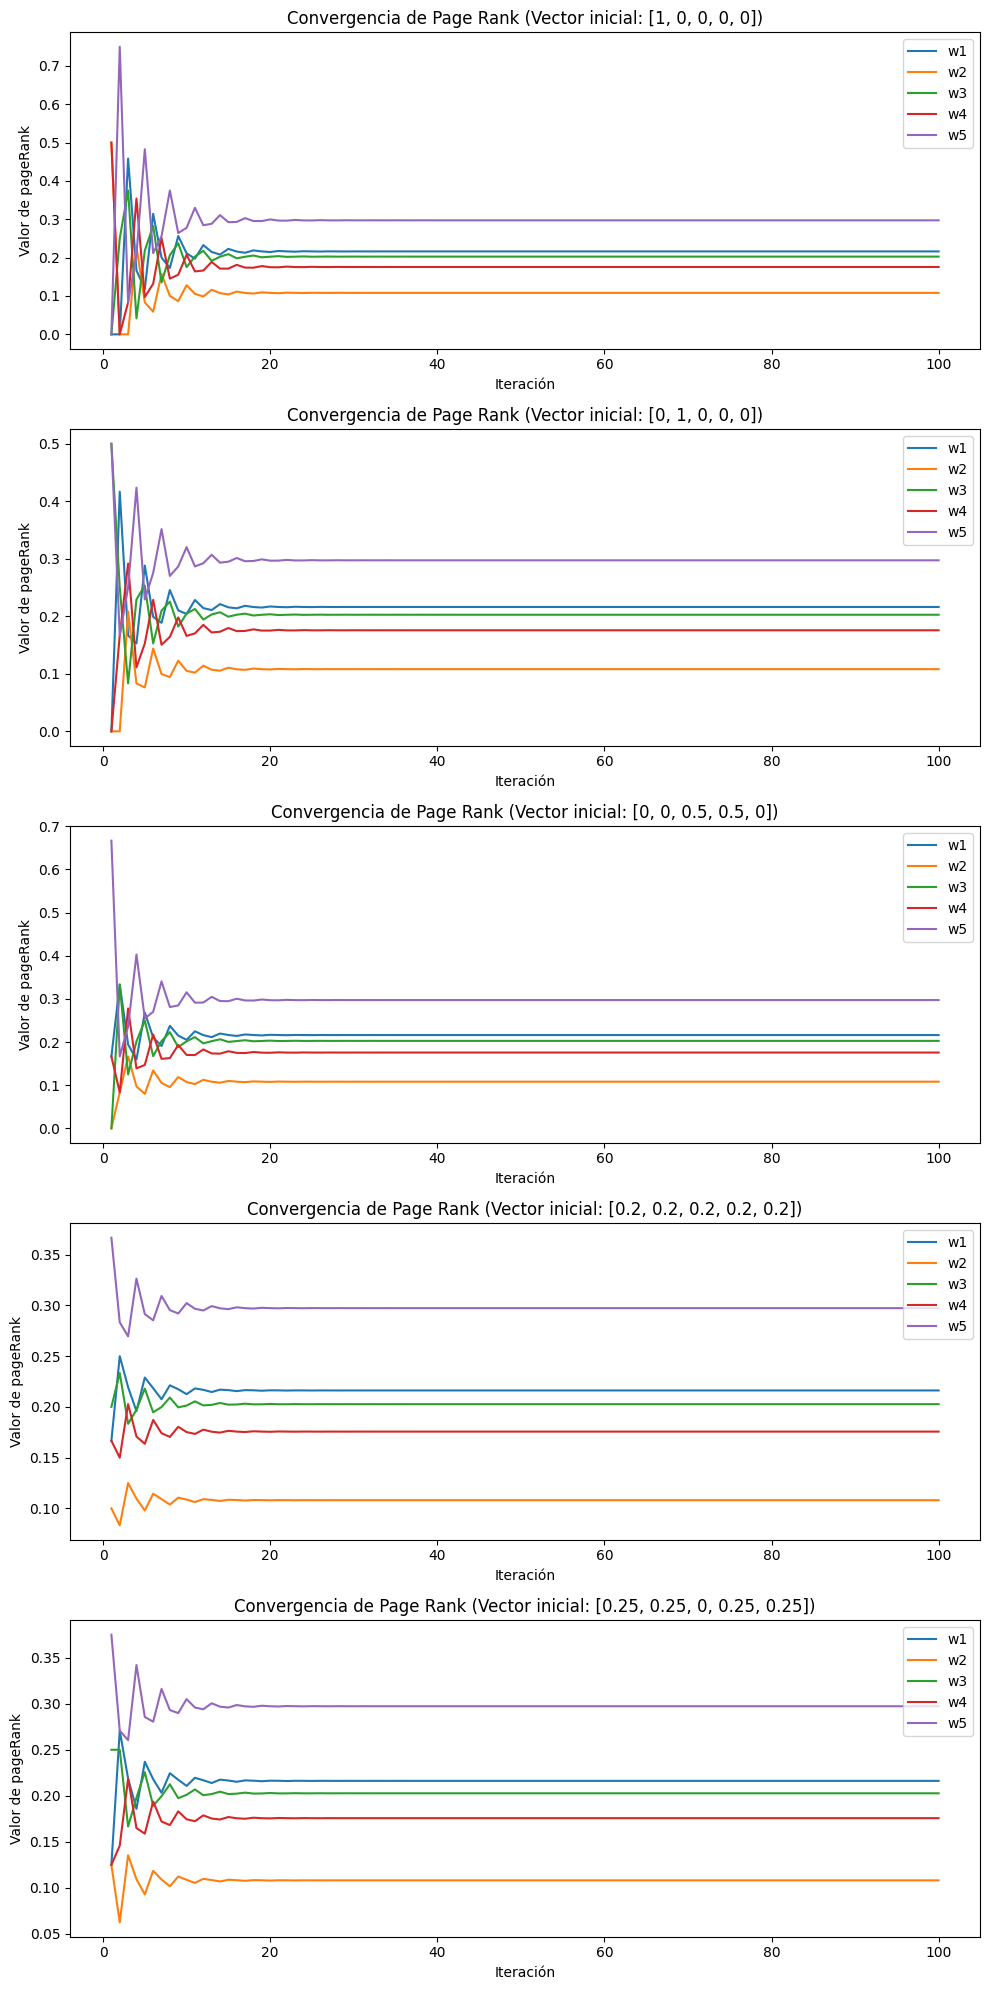

In [7]:


# Definimos la cadena de Markov
chain = {
    "w1": ["w2", "w4"],
    "w2": ["w3", "w5"],
    "w3": ["w1", "w5", "w4"],
    "w4": ["w5"],
    "w5": ["w3", "w1"],
}

# Lista de nodos
nodes = list(chain.keys())

# Distribuciones iniciales
initial_pageranks = [
    {"w1": 1, "w2": 0, "w3": 0, "w4": 0, "w5": 0},
    {"w1": 0, "w2": 1, "w3": 0, "w4": 0, "w5": 0},
    {"w1": 0, "w2": 0, "w3": 1/2, "w4": 1/2, "w5": 0},
    {"w1": 1/5, "w2": 1/5, "w3": 1/5, "w4": 1/5, "w5": 1/5},
    {"w1": 1/4, "w2": 1/4, "w3": 0, "w4": 1/4, "w5": 1/4},
]

# PageRank siguiente iteración
def next_pagerank(current_pagerank):
    new_pagerank = {node: 0 for node in nodes}
    for node, targets in chain.items():
        distributed_value = current_pagerank[node] / len(targets)
        for target in targets:
            new_pagerank[target] += distributed_value
    return new_pagerank

# Todas las iteraciones PageRank
def compute_pagerank(initial_pagerank):
    iterations = 100
    results = {node: [] for node in nodes}
    pagerank = initial_pagerank.copy()

    for _ in range(iterations):
        pagerank = next_pagerank(pagerank)
        for node in nodes:
            results[node].append(pagerank[node])

    return results

# Grafica de todos los escenarios iniciales
fig, axes = plt.subplots(5, 1, figsize=(10, 20))

for idx, initial_pagerank in enumerate(initial_pageranks):
    results = compute_pagerank(initial_pagerank)
    
    for node in nodes:
        axes[idx].plot(range(1, 101), results[node], label=node)
    
    axes[idx].set_title(f"Convergencia de Page Rank (Vector inicial: {list(initial_pagerank.values())})")
    axes[idx].set_xlabel("Iteración")
    axes[idx].set_ylabel("Valor de pageRank")
    axes[idx].legend()

plt.tight_layout()
plt.show()
